In [1]:
import pandas as pd


In [2]:
df= pd.read_csv('penguins.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [3]:
df.isnull().sum()

id                    0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3       True
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

In [5]:
df['sex']=df['sex'].map({'male':1,'female':0})
df

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0,2007
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0,2007
...,...,...,...,...,...,...,...,...,...
339,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,1.0,2009
340,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,0.0,2009
341,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,1.0,2009
342,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,1.0,2009


In [6]:
# found some null values so we need to clean our data before moving forward.

rows_with_na=df[df.isnull().any(axis=1)]#boolean masking 
rows_with_na

,id,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [7]:
# df.shape #344,9
len(rows_with_na)

# 11 rows out of 344 rows have atleast na values so dropping those rows.

11

In [8]:
df_clean=df.dropna()
df_clean.shape

(333, 9)

In [9]:
df_clean.isnull().sum()
#now with the output we can be sure that our data no longer contains any na values.

id                   0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [10]:
names=df_clean['species'].value_counts().index
counts=df_clean['species'].value_counts().values
print(names)
print(counts)

Index(['Adelie', 'Gentoo', 'Chinstrap'], dtype='object', name='species')
[146 119  68]


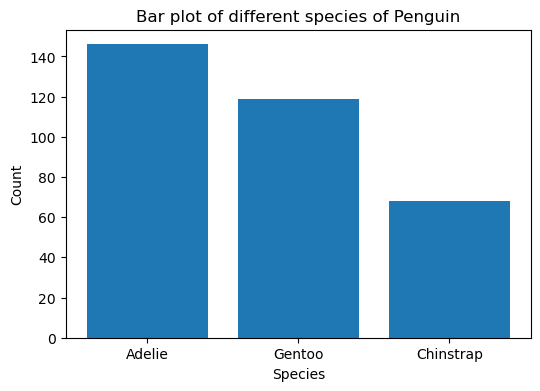

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4)) #creates a new canvas for plotting, 6inches is width and 4 inch is height. any plot we draw after this willl apeat in this figure/canvas.
plt.title("Bar plot of different species of Penguin")
plt.bar(x=names,height=counts)
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig('barPlot.png')
plt.show()

In [12]:
X=df_clean.drop(columns=['species','id','year','island'])
y=df_clean['species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# here 42 is just a seed which is starting point for fake randomness.



In [14]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
232,49.1,14.5,212.0,4625.0,0.0
84,37.3,17.8,191.0,3350.0,0.0
306,40.9,16.6,187.0,3200.0,0.0
22,35.9,19.2,189.0,3800.0,0.0
29,40.5,18.9,180.0,3950.0,1.0


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [16]:
knn=KNeighborsClassifier(n_neighbors=3) #Picks 3 nearest neighbors
knn.fit(X_train,y_train) #stores the training data and prepares it for nearest-neighbor search — it does not “learn” parameters.

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [17]:
y_pred=knn.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy =  0.7611940298507462
              precision    recall  f1-score   support

      Adelie       0.70      0.90      0.79        31
   Chinstrap       0.86      0.33      0.48        18
      Gentoo       0.85      0.94      0.89        18

    accuracy                           0.76        67
   macro avg       0.80      0.73      0.72        67
weighted avg       0.78      0.76      0.73        67



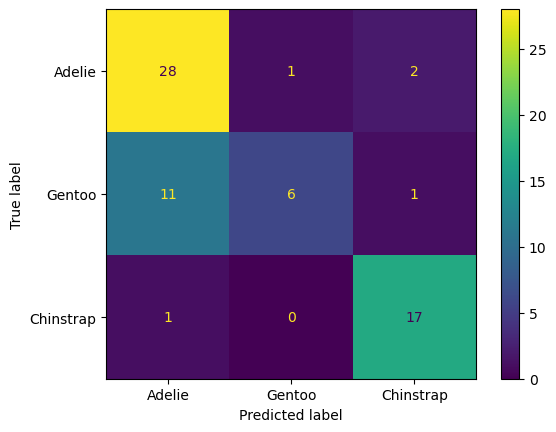

In [18]:
cm=confusion_matrix(y_test,y_pred)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=df["species"].unique())
cm_plot.plot()
plt.savefig("confusion_matrix_png")

In [ ]:
test_pred=knn.predict([36.7,19.3,193.0,3450.0,0])

In [19]:
import joblib

joblib.dump(knn,'model.joblib')
print('success')

success
